Length of L1 = 
14
det of TMout is:  (0.9999999999999973-7.771561172376075e-16j)
det of TMout is:  (1.0000000000000044-3.885780586188065e-16j)
det of TMout is:  (1.000000000000007+6.106226635438404e-16j)
det of TMout is:  (1.0000000000000027-2.220446049250319e-16j)
det of TMout is:  (0.9999999999999947-2.7755575615628766e-16j)
det of TMout is:  (0.9999999999999959+2.2204460492503042e-16j)
det of TMout is:  (0.9999999999999982-5.551115123125773e-17j)
det of TMout is:  (1.0000000000000007+9.992007221626415e-16j)
det of TMout is:  (0.9999999999999971+3.3306690738754603e-16j)
det of TMout is:  (0.999999999999999-1.942890293094022e-16j)
det of TMout is:  (1.0000000000000013+2.8449465006019676e-16j)
det of TMout is:  (1.0000000000000075+6.453171330633771e-16j)
det of TMout is:  (0.9999999999999853+0j)
det of TMout is:  (1.0000000000000062+8.326672684688723e-17j)
det of TMout is:  (0.9999999999999943+1.11022302462515e-16j)
det of TMout is:  (1.0000000000000033+5.551115123125802e-17j)
det of T

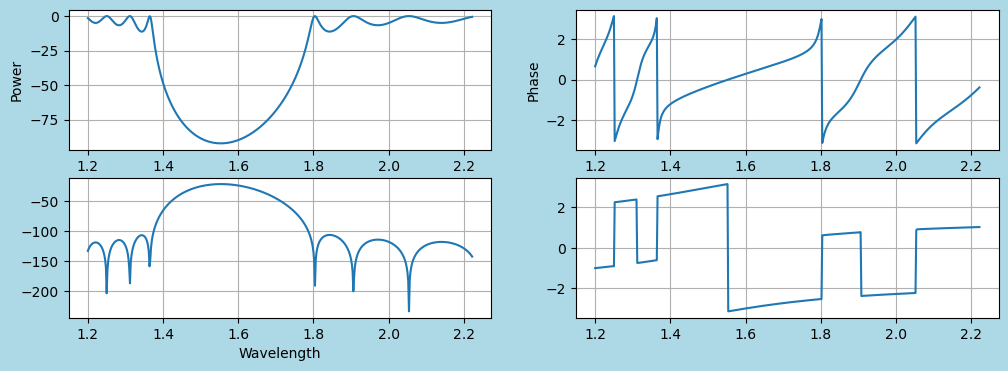

In [1]:
#2022/10/7
# Takeshi Ozeki, Optical Curcit. p.89 multilayer dielectric film filters

import cmath
import numpy as np
import matplotlib.pyplot as plt

def dielectric(wl, n1, n2, th1, th2, Ein):

    T1 = np.array([[np.exp(-1j*n1*th1*2*np.pi/wl), 0], [0, np.exp(1j*n1*th1*2*np.pi/wl)]])
    T2 = np.array([[np.exp(-1j*n2*th2*2*np.pi/wl), 0], [0, np.exp(1j*n2*th2*2*np.pi/wl)]])

    D21 = np.array([[(n1+n2)/(2*np.sqrt(n1*n2)), (n2-n1)/(2*np.sqrt(n1*n2))],[(n2-n1)/(2*np.sqrt(n1*n2)), (n1+n2)/(2*np.sqrt(n1*n2))]])
    D12 = np.array([[(n1+n2)/(2*np.sqrt(n1*n2)), (n1-n2)/(2*np.sqrt(n1*n2))],[(n1-n2)/(2*np.sqrt(n1*n2)), (n1+n2)/(2*np.sqrt(n1*n2))]])

    #D21 = np.array([[(n1+n2), (n2-n1)],[(n2-n1), (n1+n2)]])
    #D12 = np.array([[(n1+n2), (n1-n2)],[(n1-n2), (n1+n2)]])

    #D21 = (1/(2*np.sqrt(n1*n2)))* np.array([[n1+n2, n2-n1],[n2-n1, n1+n2]])
    #D12 = (1/(2*np.sqrt(n1*n2)))* np.array([[n1+n2, n1-n2],[n1-n2, n1+n2]])

    #Assuming n1 < n2

    # T matrix

    E1 = np.dot(T1,Ein)
    E2 = np.dot(D21,E1)
    E3 = np.dot(T2,E2)
    E4 = np.dot(D12,E3)

    #Eout = (D12*T2*D21*T1)**m
     
    Eout1 = E4

    return Eout1

startwl = 1.200 # [um]
stepwl = 0.002 # [um]
nn = 512 # Sampling point number

# Asssume quarter waelength
# 1550nm * 0.25 --> 387.5 nm (Air)
# 387.5nm/1.463 --> 264.866 nm (nL)
# 387.5nm/2.130 --> 181.924 nm (nH)

# Thickness in micrometer

L1 = [0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866, 0.264866]

L2 = [0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924, 0.181924]
 
mm = len(L1)

print('Length of L1 = ')
print(mm)


wlcol = np.zeros(nn)
P1dBcol = np.zeros(nn)
P2dBcol = np.zeros(nn)
P1_phasecol = np.zeros(nn)
P2_phasecol = np.zeros(nn)

Ein = np.array([[1],[0]]) 

#n0: refractive Index of Air
n0 = 1.00

for ii in range(nn):   
    
   wl = startwl + stepwl*ii
   wlcol[ii] = wl
   #print(wl)

   n1 = 1.463 + 0.003827/(wl**2) + 0.000/(wl**4)
   n2 = 2.1305 + 0.018499/(wl**2) + 0.00199850/(wl**4)
   #ns = 1.6553 + 0.0086444/(wl**2) + 0.00081178/(wl**4)
   
   TM_eye = np.array([[1,0],[0,1]]) 

   D01 = np.array([[(n0+n1)/(2*np.sqrt(n0*n1)), (n1-n0)/(2*np.sqrt(n0*n1))],[(n1-n0)/(2*np.sqrt(n0*n1)), (n0+n1)/(2*np.sqrt(n0*n1))]]);# Air to n1 material (typically SiO2)

   TMin = np.dot(D01, TM_eye)
   
   for jj in range(mm):

        #print(jj)

        th1 = L1[jj]
        th2 = L2[jj]           

        TM_intermedate = dielectric(wl, n1, n2, th1, th2, TMin)
        TMin = TM_intermedate
        #print(E_intermedate)
    
   TM_stack = TM_intermedate
    
   detTMout = np.linalg.det(TM_stack) # Verify det is unity.
   print("det of TMout is: ", detTMout)

   Eout1 = np.dot(TM_stack, Ein)

   T_substrate = np.array([[np.exp(-1j*n1*0.0001*2*np.pi/wl), 0], [0, np.exp(1j*n1*0.0001*2*np.pi/wl)]]);

   Eout2 = np.dot(T_substrate, Eout1)

   # n1 material (typically SiO2) to Air
   D10 = np.array([[(n1+n0)/(2*np.sqrt(n0*n1)), (n0-n1)/(2*np.sqrt(n0*n1))],[(n0-n1)/(2*np.sqrt(n0*n1)), (n1+n0)/(2*np.sqrt(n0*n1))]])

   Eout3 = np.dot(D10, Eout2)

   Eout3_x = Eout3[0,0]   
   Eout3_y = Eout3[1,0]
   
   Pow1 = (np.abs(Eout3_x))**2
   P1_Phase = cmath.phase(Eout3_x)
   P1_phasecol[ii] = P1_Phase

   coef1 = mm*2+2
   Pow2 = (n1/n2)**coef1 * (np.abs(Eout3_y))**2  

   P2_Phase = cmath.phase(Eout3_y)
   P2_phasecol[ii] = P2_Phase

   P1dBcol[ii] = -10*np.log(Pow1)
   P2dBcol[ii] = 10*np.log(Pow2)


fig = plt.figure(figsize = (12,4), facecolor='lightblue')

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(wlcol,P1dBcol)

ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power")
ax1.grid()

ax2.plot(wlcol,P1_phasecol)
ax2.set_ylabel("Phase")
ax2.grid()

ax3.plot(wlcol,P2dBcol)
ax3.grid()
ax3.set_xlabel("Wavelength")

ax4.plot(wlcol,P2_phasecol)
ax4.grid()

plt.show()

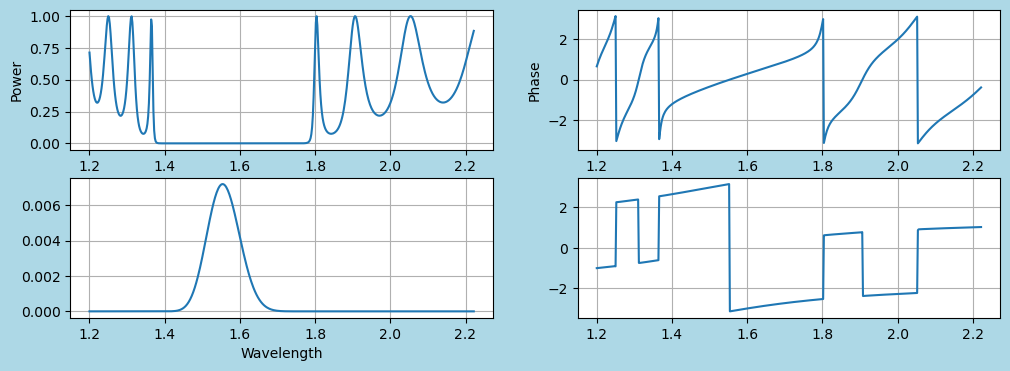

In [2]:
fig2 = plt.figure(figsize = (12,4), facecolor='lightblue')

ax1 = fig2.add_subplot(2, 2, 1)
ax2 = fig2.add_subplot(2, 2, 2)
ax3 = fig2.add_subplot(2, 2, 3)
ax4 = fig2.add_subplot(2, 2, 4)

ax1.plot(wlcol,10**(0.1*P1dBcol))

ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power")
ax1.grid()

ax2.plot(wlcol,P1_phasecol)
ax2.set_ylabel("Phase")
ax2.grid()

ax3.plot(wlcol,10**(0.1*P2dBcol))
ax3.grid()
ax3.set_xlabel("Wavelength")

ax4.plot(wlcol,P2_phasecol)
ax4.grid()

plt.show()